### Clustering = grouping similar data points together without labels
You’re similar. You sit together.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('driver-data.csv')

In [3]:
df.shape

(4000, 3)

In [4]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
features= df.drop(columns=['id'])

In [6]:
features.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


<Axes: xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

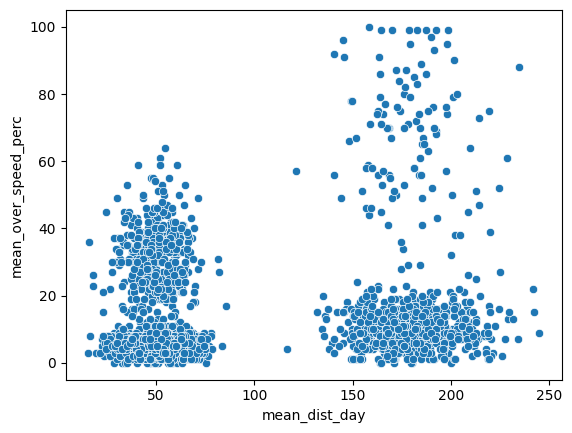

In [7]:
sns.scatterplot(data=features, x=features.mean_dist_day, y=features.mean_over_speed_perc)

In [8]:
kmeans=KMeans(n_clusters=3)

In [9]:
clusters=kmeans.fit(features)

In [10]:
clusters.labels_

array([1, 1, 1, ..., 2, 2, 2], shape=(4000,), dtype=int32)

In [11]:
np.unique(clusters.labels_)

array([0, 1, 2], dtype=int32)

In [12]:
kmeans.inertia_

992634.0606702475

In [13]:
df['clusters']= clusters.labels_
df.tail()

,id,mean_dist_day,mean_over_speed_perc,clusters
3995,3423310685,160.04,10,2
3996,3423312600,176.17,5,2
3997,3423312921,170.91,12,2
3998,3423313630,176.14,5,2
3999,3423311533,168.03,9,2


In [14]:
silhouette_score(features,clusters.labels_)

np.float64(0.8231396834167266)

<Axes: xlabel='mean_dist_day', ylabel='mean_over_speed_perc'>

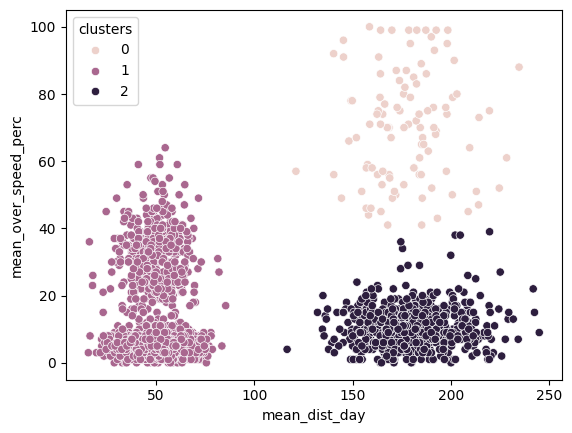

In [ ]:
sns.scatterplot(data=features,  x=features.mean_dist_day, y=features.mean_over_speed_perc,hue=df.clusters)

Elbow Method

In [16]:
inertia=[]
for i in range(1,11):
  kmeans= KMeans(n_clusters=i)
  kmeans.fit(features)
  inertia.append(kmeans.inertia_)
print(inertia)


[12184626.129627978, 1316420.850947719, 992634.0606702475, 786440.179991949, 534903.2690516072, 372930.6741348251, 319775.4583692369, 276993.8313711474, 256246.09789382547, 233633.89483199085]


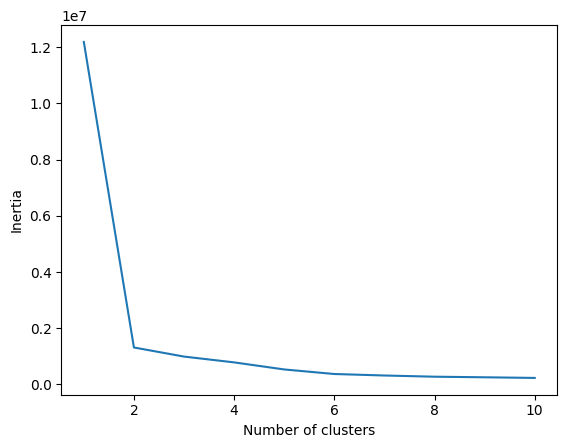

In [17]:
plt.plot(range(1,11),inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [18]:
kmeans=KMeans(n_clusters=2)
clusters=kmeans.fit(features)
silhouette_score(features,clusters.labels_)

np.float64(0.8490223286225532)

In [19]:
!pip install yellowbrick

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from yellowbrick.cluster import KElbowVisualizer

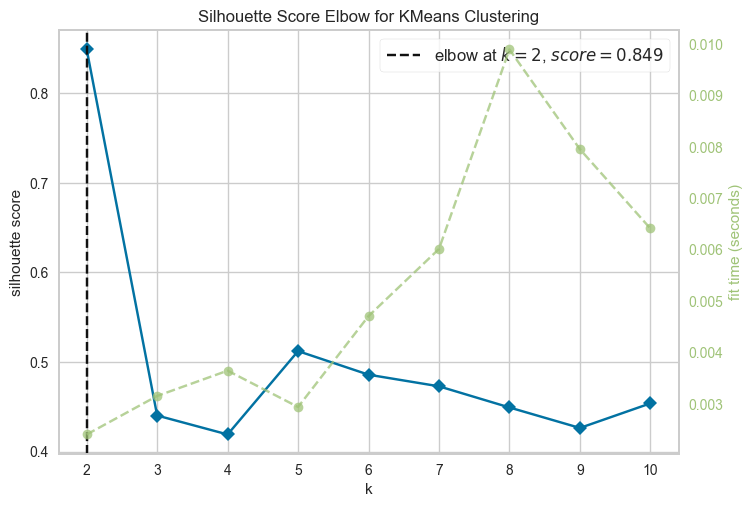

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
visualizer= KElbowVisualizer(kmeans,k=(2,11),metric='silhouette')
visualizer.fit(features)
visualizer.show()

# Clustering is an unsupervised learning technique that groups similar data points to discover hidden structure in unlabeled data